In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from urllib.parse import unquote
import requests
import tarfile
import networkx as nx
import os
import community as community_louvain

### Datasets

Download links at [https://zenodo.org/records/4650046](https://zenodo.org/records/4650046)

GitHub Project: [https://github.com/epfl-dlab/YouNiverse](https://github.com/epfl-dlab/YouNiverse)

In [13]:
datasets = [("https://zenodo.org/records/4650046/files/_raw_df_channels.tsv.gz?download=1", "channels.tsv.gz"),
            ("https://zenodo.org/records/4650046/files/_raw_df_timeseries.tsv.gz?download=1", "time_series.tsv.gz" ),
            ("https://zenodo.org/records/4650046/files/num_comments.tsv.gz?download=1", "num_comments.tsv.gz")]

for dataset in datasets:
    url = dataset[0]
    file_name = dataset[1]
    if not os.path.exists(file_name):
        response = requests.get(url, stream=True)
        with open(file_name, 'wb') as file:
            for chunk in response.iter_content(chunk_size=1024):
                if chunk:
                    file.write(chunk)

### Channels

In [8]:
channels = pd.read_csv("channels.tsv.gz", sep='\t', compression='gzip')
channels.head()

,category_cc,join_date,channel,name_cc,subscribers_cc,videos_cc,subscriber_rank_sb
0,Film and Animation,2017-05-21,UCBJuEqXfXTdcPSbGO9qqn1g,MagnusNation,65100,28,231223.0
1,Entertainment,2011-12-13,UCkNW9Q1VR_aeZ6uht83jJVQ,Mago Dario Animazion...,60200,48,238538.0
2,Music,2008-03-17,UCXhkGgooXHDNwgJXmoTSN7g,Mago Merlino,14800,838,707828.0
3,Entertainment,2014-10-19,UCvZGsuvKlYOGiZTsxwJNS5Q,MAGO TOMÁS,26200,31,424550.0
4,Comedy,2017-01-15,UCxJWPpPED-J24znoKyKZYjg,Magog of Morskar,29400,158,422966.0


In [12]:
channels.describe()

,subscribers_cc,videos_cc,subscriber_rank_sb
count,1.569770e+05,156977.000000,1.533300e+05
mean,2.415465e+05,700.634354,3.573119e+05
std,1.110144e+06,4439.410641,2.709194e+05
min,1.000000e+04,10.000000,3.000000e+00
25%,1.880000e+04,69.000000,1.165692e+05
50%,4.210000e+04,173.000000,3.025270e+05
75%,1.360000e+05,440.000000,5.707568e+05
max,1.121395e+08,461923.000000,1.101245e+06


### Time Series

In [9]:
time_series = pd.read_csv("time_series.tsv.gz", sep='\t', compression='gzip')

,channel,category,datetime,views,delta_views,subs,delta_subs,videos,delta_videos,activity
0,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-03 00:00:00,2.024946e+05,0.000000,650.222222,0.000000,5,0,3
1,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-10 00:00:00,3.940857e+05,191591.111111,1046.000000,395.777778,6,1,1
2,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-17 00:00:00,8.353938e+05,441308.083333,1501.500000,455.500000,6,0,1
3,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-24 00:00:00,1.104577e+06,269183.250000,1750.000000,248.500000,6,0,0
4,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-31 00:00:00,1.284406e+06,179828.600000,2008.300000,258.300000,6,0,0


In [10]:
time_series.head()

,channel,category,datetime,views,delta_views,subs,delta_subs,videos,delta_videos,activity
0,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-03 00:00:00,2.024946e+05,0.000000,650.222222,0.000000,5,0,3
1,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-10 00:00:00,3.940857e+05,191591.111111,1046.000000,395.777778,6,1,1
2,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-17 00:00:00,8.353938e+05,441308.083333,1501.500000,455.500000,6,0,1
3,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-24 00:00:00,1.104577e+06,269183.250000,1750.000000,248.500000,6,0,0
4,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-31 00:00:00,1.284406e+06,179828.600000,2008.300000,258.300000,6,0,0


In [11]:
time_series.describe()

,views,delta_views,subs,delta_subs,videos,delta_videos,activity
count,2.155365e+07,2.155365e+07,2.155365e+07,2.155365e+07,2.155365e+07,2.155365e+07,2.155365e+07
mean,4.435084e+07,3.817904e+05,1.484632e+05,1.309480e+03,4.156606e+02,2.261714e+00,5.033164e+00
std,3.522652e+08,3.900813e+06,7.789956e+05,1.786347e+04,1.441921e+03,1.463560e+01,3.010005e+01
min,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.339945e+06,9.374228e+03,8.930573e+03,3.455556e+01,4.100000e+01,0.000000e+00,0.000000e+00
50%,4.685746e+06,3.428997e+04,2.065548e+04,1.268555e+02,1.210000e+02,0.000000e+00,1.000000e+00
75%,1.633154e+07,1.336119e+05,6.960600e+04,5.231333e+02,3.320000e+02,2.000000e+00,4.000000e+00
max,8.411483e+10,6.659719e+09,1.125714e+08,2.061360e+07,1.418270e+05,3.158000e+04,3.159700e+04


### Num Comments

In [14]:
num_comments = pd.read_csv("num_comments.tsv.gz", sep='\t', compression='gzip')

In [15]:
num_comments.head()

,display_id,num_comms
0,SBqSc91Hn9g,0.0
1,UuugEl86ESY,0.0
2,oB4c-yvnbjs,48.0
3,ZaV-gTCMV8E,6.0
4,cGvL7AvMfM0,5.0


In [16]:
num_comments.describe()

,num_comms
count,7.292479e+07
mean,1.217165e+02
std,1.343391e+03
min,0.000000e+00
25%,0.000000e+00
50%,5.000000e+00
75%,3.900000e+01
max,1.125155e+06


### Comments

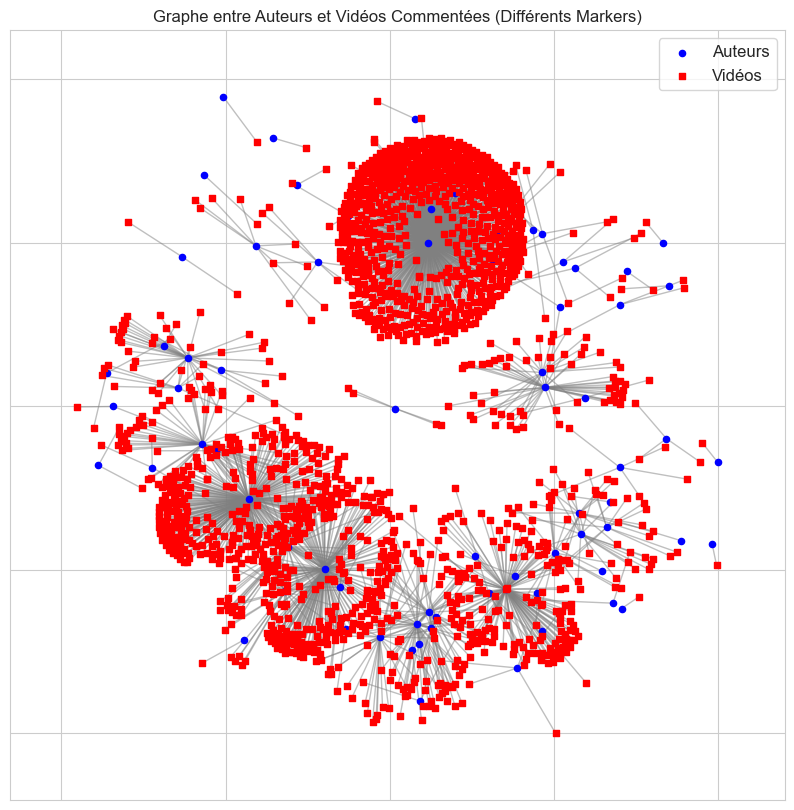

In [55]:
file_path = 'D:\YouNiverse\youtube_comments.tsv.gz'
chunksize = 100  # Number of rows per chunk

df = pd.DataFrame(columns=['author', 'video_id'])

# Read the first n_chunks chunks
n_chunks = 20
chunk_iter = pd.read_csv(file_path, sep='\t', chunksize=chunksize, compression='gzip', usecols=['author', 'video_id'])
for i, chunk in enumerate(chunk_iter):
    if i < n_chunks:
        df = pd.concat([df, chunk[['author', 'video_id']]])
    else:
        break

df = df.dropna()

# Create a graph from the dataframe and add edges between authors and videos
G = nx.Graph()
for index, row in df.iterrows():
    G.add_edge(row['author'], row['video_id'])

# Separate the nodes into two sets: authors and videos
authors = set(df['author'])
videos = set(df['video_id'])

plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G, k=0.05, iterations=20)  
nx.draw_networkx_nodes(G, pos, nodelist=authors, node_shape='o', node_size=20, node_color='blue', label='Auteurs')
nx.draw_networkx_nodes(G, pos, nodelist=videos, node_shape='s', node_size=20, node_color='red', label='Vidéos')
nx.draw_networkx_edges(G, pos, edge_color='gray', alpha=0.5)
plt.legend(scatterpoints=1, markerscale=1, fontsize=12)
plt.title('Graphe entre Auteurs et Vidéos Commentées (Différents Markers)')
plt.show()